In [1]:
import numpy as np
import pandas as pd
import gzip,pickle,os
from tqdm import tqdm_notebook as tq
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display



In [4]:
# here we specify the results folder
data_dir = 'P:/Projects/BigMusic/echonest_features/'


In [5]:
# print out the result folders within the relevant  folder so we can pick the one of interest
print([f for f in os.listdir('{}'.format(data_dir)) if os.path.isdir('{}/{}'.format(data_dir,f))])

['echonest_655791_1000_100_100000_20000_20896']


In [21]:
# now we select the result folder of interest
result_params = 'echonest_655791_1000_100_100000_20000_20896'
result_dir = '{}/{}/'.format(data_dir,result_params)

# we'll also make a little dictionary mapping bin numbers to the corresponding year ranges
# (this is extracted from the result file names)
bin_name_dict = {}
for f in os.listdir(result_dir):
    fname = f.split('_')
    bin_dict[int(fname[2])] = fname[-1]
bin_idx_dict = {b:i for i,b in enumerate(sorted(bin_dict.keys()))}

xt = [v for k,v in sorted(bin_dict.items(),key=lambda x: x[0])]
xr = range(len(bin_dict))
print(bin_dict)

{2: '1975-1979', 3: '1980-1984', 4: '1985-1989', 5: '1990-1994', 6: '1995-1999', 7: '2000-2004', 8: '2005-2009', 9: '2010-2014'}


,idx,dists,neighbor_counts
0,951664,"[0.0343932834611, 0.0323486908581, 0.031720938...","[149, 135, 118, 123, 131, 113, 113, 118]"
1,832217,"[0.0033617392424, 0.00356202956055, 0.00335688...","[117, 120, 116, 126, 108, 131, 149, 133]"
2,376239,"[0.00733562279278, 0.0071273094194, 0.00780326...","[82, 83, 87, 72, 134, 154, 174, 214]"
3,869828,"[0.00413120508761, 0.00403271205507, 0.0040572...","[265, 215, 193, 102, 63, 66, 56, 40]"
4,726697,"[0.0105189640966, 0.0100226281237, 0.009998633...","[110, 177, 123, 135, 117, 136, 103, 99]"


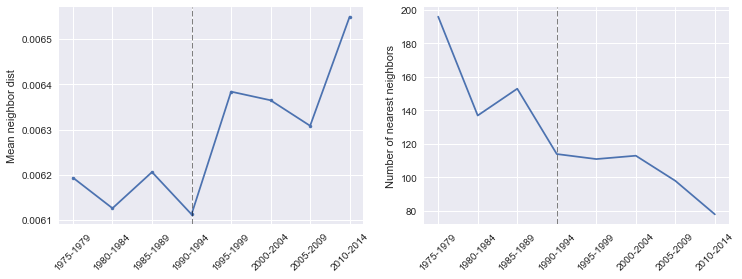

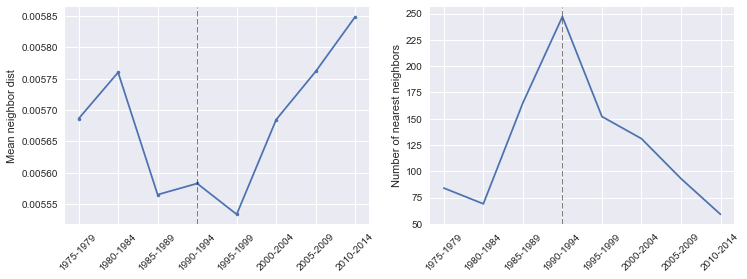

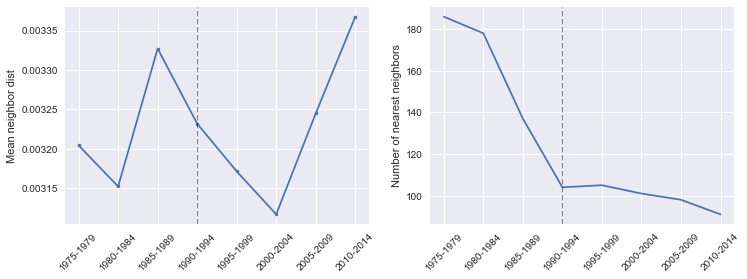

In [33]:
# Just an example of handling a results file and plotting the relevant results.
# This just shows the result data for three randomly selected songs

# specify year bin
year_bin = 5
# load dataframe
df = pd.read_table(result_dir+'results_bin_{}_{}'.format(year_bin,bin_dict[year_bin]),header=None,names=['idx','dists','neighbor_counts'])
# convert strings to arrays
df['dists'] = df['dists'].apply(lambda x: np.array(x.split(','),dtype=float))
df['neighbor_counts'] = df['neighbor_counts'].apply(lambda x: np.array(x.split(','),dtype=int))
display(df.head())

# for a particular paper we can look at both its mean distance to neighbors each year,
# and the frequency distribution of neighbors over time.
# We draw a vertical line to indicate the publication year of the target paper
# Here are a few examples:
for random_song in np.random.randint(len(df),size=3):
    fig,axes = plt.subplots(1,2,figsize=(12,4))

    ax = axes[0]
    ax.plot(xr,df.iloc[random_song].dists,marker='.')
    ax.set_ylabel('Mean neighbor dist')
    ax.axvline(bin_idx_dict[year_bin],c='k',ls='--',lw=0.5)
    ax.set_xticks(xr)
    ax.set_xticklabels(xt,rotation=45)

    ax = axes[1]
    ax.plot(xr,df.iloc[random_song].neighbor_counts)
    ax.set_ylabel('Number of nearest neighbors')
    ax.axvline(bin_idx_dict[year_bin],c='k',ls='--',lw=0.5)
    ax.set_xticks(xr)
    ax.set_xticklabels(xt,rotation=45)
    


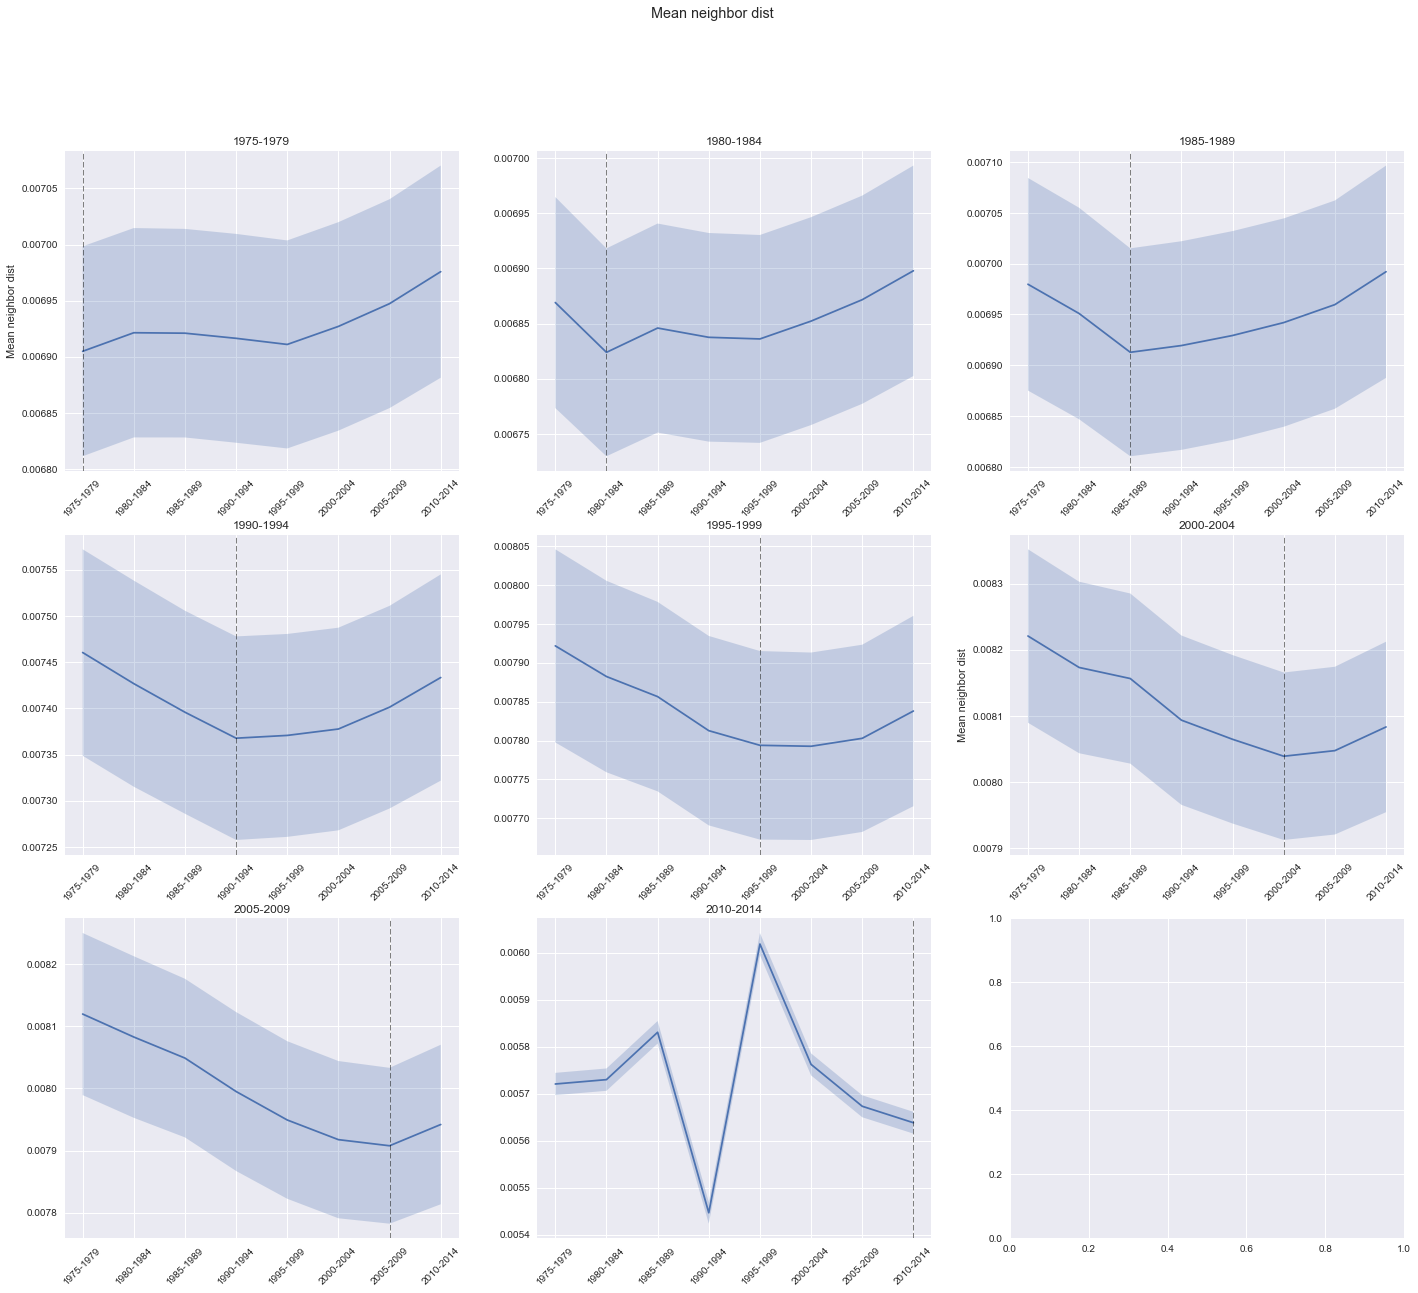

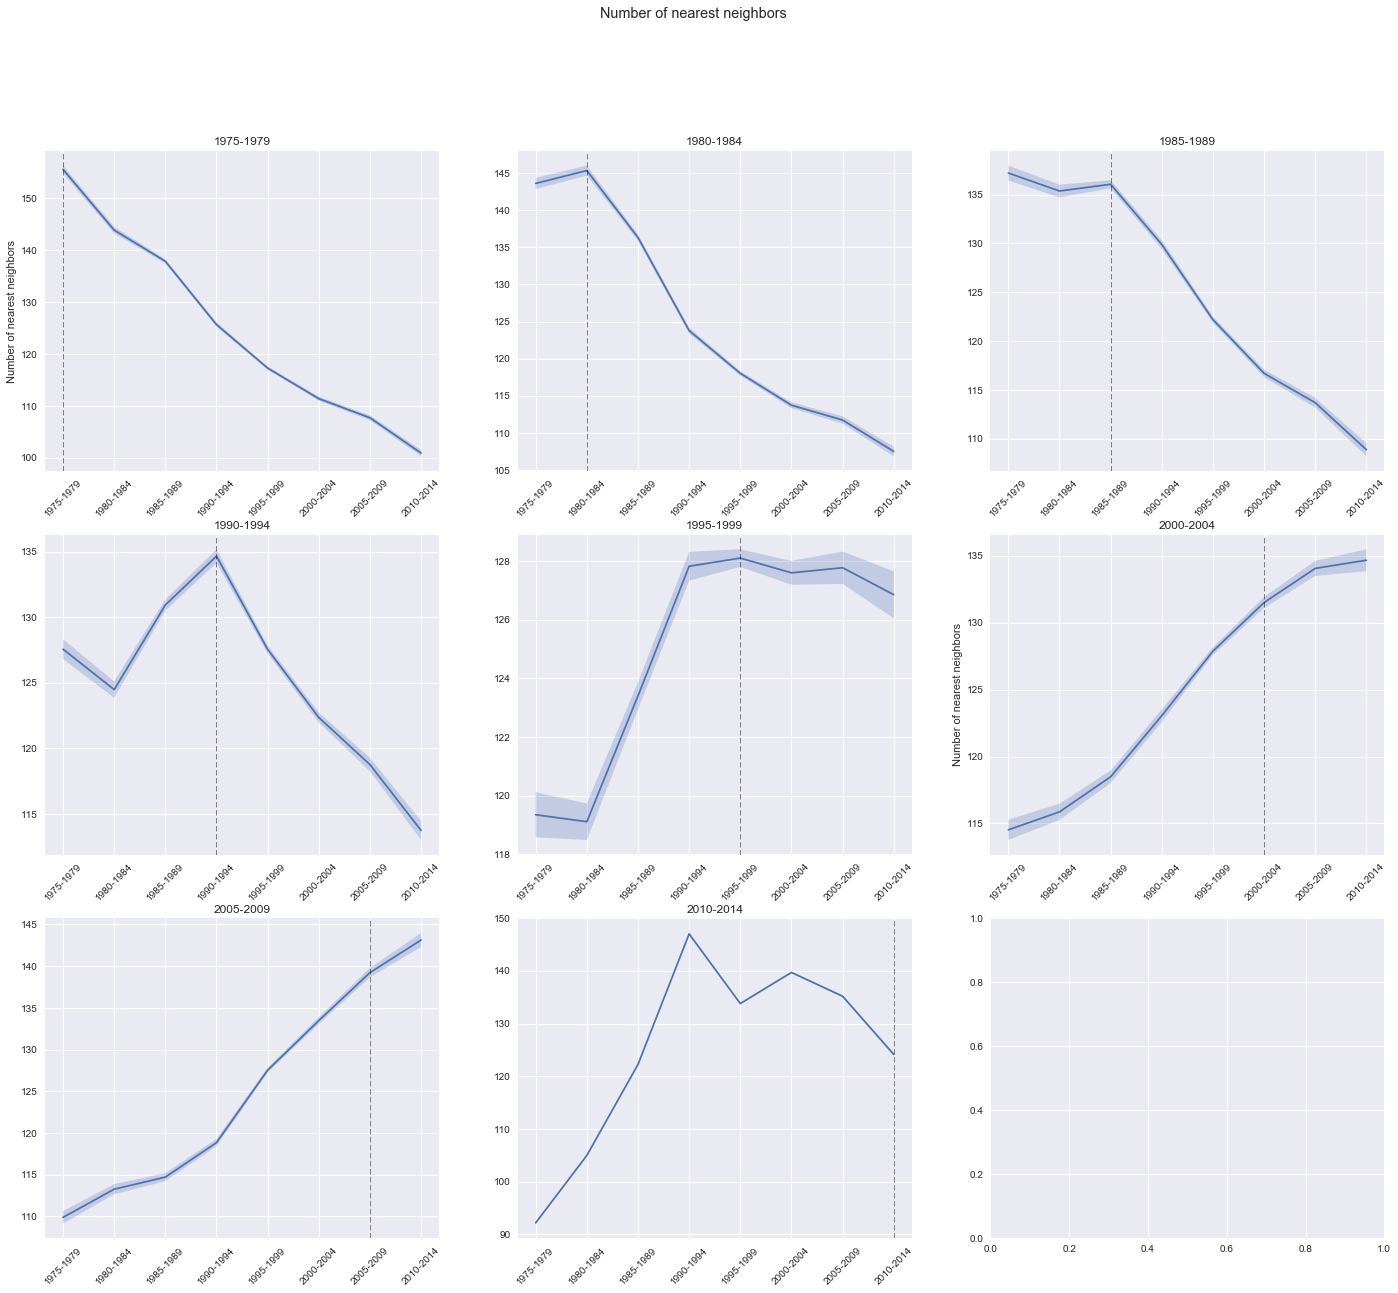

In [39]:
# Now let's extend this to plot the same results, averaged across all songs released each year.
# In other words, we're plotting the same curves as above, averaged across all songs released
# each year. Error bars are confidence intervals on the ean 

# adjust subplot layout based on number of bins
import math
n = int(math.ceil(math.sqrt(len(xt))))
fig_dict = {'dists':plt.subplots(n,n,figsize=(24,20)),
            'neighbor_counts':plt.subplots(n,n,figsize=(24,20))}
ylabels = {'dists':'Mean neighbor dist','neighbor_counts':'Number of nearest neighbors'}
    
for i,year_bin in enumerate(bin_dict):
    df = pd.read_table(result_dir+'results_bin_{}_{}'.format(year_bin,bin_dict[year_bin]),header=None,names=['idx','dists','neighbor_counts'])
    df['dists'] = df['dists'].apply(lambda x: np.array(x.split(','),dtype=float))
    df['neighbor_counts'] = df['neighbor_counts'].apply(lambda x: np.array(x.split(','),dtype=int))
    arrs = {}
    arrs['dists'] = np.array([row for row in df.dists.values])
    arrs['neighbor_counts'] = np.array([row for row in df.neighbor_counts.values])
    for measure in fig_dict:
        ax = fig_dict[measure][1].flat[i]
        arr = arrs[measure]
        m = np.nanmean(arr,0)
        ax.plot(m)
        ci = 1.96*(np.nanstd(arr,0)/np.sqrt(len(arr)))
        ax.fill_between(xr,m-ci,m+ci,alpha=0.25)
        ax.set_xticks(xr)
        ax.set_xticklabels(xt,rotation=45)
        ax.axvline(i,c='k',ls='--',lw=0.5)
        ax.set_title(bin_dict[year_bin])
        if i%5==0:
            ax.set_ylabel(ylabels[measure])
for k in fig_dict:
    fig_dict[k][0].suptitle(ylabels[k])


